
# Introduction to Computer Vision

Summer Semester 2022, 17.05.2022, Otto von Guericke University Magdeburg.

# 4. Exercise - Features

In this exercise, we will again work with the [car racing](https://gym.openai.com/envs/CarRacing-v0/) environment from [Gym](http://gym.openai.com). Our goal is to apply different computer vision approaches to the simulator.

The goal of this exercise is to generate different filter banks for texture extraction on the generated data. For this purpose, the generated images from the last assignment can be used. First, the **OpenCV** functions are used for the filter bank implementation. Then, the filter banks should be implemented without using the **OpenCV** package.


*Important*: You need to install [Gym](http://gym.openai.com) in your system. The installation can be done with pip or by installing from the sources. More information at [https://gym.openai.com/docs/#installation](https://gym.openai.com/docs/#installation).

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

## A. Harris Corner Detector

In this exercise, the Harris corner detector should be implemented for Car Racing images. It should be programmed from scratch, while the gradients can be extracted using the Sobel operator of **OpenCV**. The implementation of the Harris corner detection from **OpenCV** can be used for verifying the results. Visualise the detected corners and edges.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Harris corner detector without using OpenCV

In [2]:
def harris(img,window_size,k,threshold):
    img = cv2.imread(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)      
    height = img.shape[0]
    width = img.shape[1]
    matrix_R = np.zeros((height,width))
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy
    offset = int( window_size / 2 )
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R

    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                cv2.circle(img,(x,y),3,(0,255,0))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

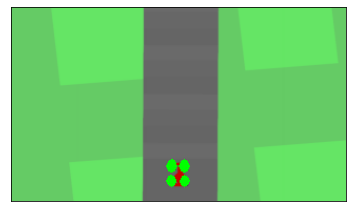

In [3]:
harris("G://OVGU Study//Sem2//Introduction to Computer Vision//Assignments//assign1//image.png", 5, 0.04, 0.30)

Harris corner detector using OpenCV

In [5]:
img = cv2.imread(r"G://OVGU Study//Sem2//Introduction to Computer Vision//Assignments//assign1//image.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('harris corner detector using open cv',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## B. Laplacian of Gaussian

In this exercise, the Laplacian of Gaussian and the difference of Gaussians should be implemented. Similarly to exercise A, it is fine to use **OpenCV** functions for the gradient computation. Visualise the detected features and compare the results of Laplacian of Gaussian with the differences of Gaussian.

In [6]:
import cv2
img = cv2.imread(r"G://OVGU Study//Sem2//Introduction to Computer Vision//Assignments//assign1//image.png")

# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)

# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
cv2.imshow('low_sigma',low_sigma)
cv2.waitKey(0)
cv2.imshow('high_sigma',high_sigma)
cv2.waitKey(0)
cv2.imshow('DoG',dog)
cv2.waitKey(0)

-1

In [7]:
import cv2
import numpy as np

# Load the image in greyscale
img = cv2.imread(r"G://OVGU Study//Sem2//Introduction to Computer Vision//Assignments//assign1//image.png",0)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)

# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)

# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()

cv2.imshow('a7',laplacian1)
cv2.waitKey(0)

-1